100%|██████████| 50/50 [00:01<00:00, 40.12it/s]


Text(0.5, 1.0, 'Characteristic time for symmetric graph')

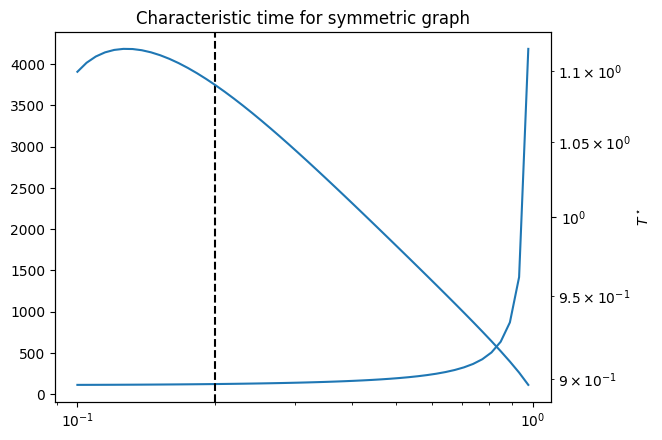

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.stats import entropy
from baifg.utils.characteristic_time import evaluate_characteristic_time_gaussian, compute_characteristic_time_gaussian
from baifg.model.feedback_graph import FeedbackGraph, Graph
from baifg.model.reward_model import GaussianRewardModel



def make_loopystar_graph(p: float, K: int) -> FeedbackGraph:
    G = np.zeros((K,K))
    G[0] = [p] + [(1-p)/K] * (K-1)
    G[1:,1:] = np.eye(K-1) * (1-p)

    R = GaussianRewardModel(np.linspace(0.1, 1, K))

    G = Graph(G)
    fg = FeedbackGraph(R, G)
    return fg

K = 4
eps = 1e-2
N = 50
pvalues = np.logspace(-1, -eps, N)
p0 = 1/(1+K)
Tvalues = []
entropies_w = []
for p in tqdm(pvalues):
    fg = make_loopystar_graph(p, K)
    sol = compute_characteristic_time_gaussian(fg)
    entropies_w.append(entropy(sol.wstar))
    Tvalues.append(sol.value)
Tvalues = np.array(Tvalues)
entropies_w = np.array(entropies_w)

plt.plot(pvalues, Tvalues)
plt.axvline(x=p0, color='black', linestyle='--', label=f'x = {p0:.2f}')


plt.twinx()
plt.plot(pvalues, entropies_w)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('$x$')
plt.ylabel('$T^\star$')
plt.title("Characteristic time for symmetric graph")

In [14]:
p1 = 0.99
sol0 = compute_characteristic_time_gaussian(make_loopystar_graph(p0, K))
sol1 = compute_characteristic_time_gaussian(make_loopystar_graph(p1, K))

print(sol0.wstar)
print(sol1.wstar)

[0.10683622 0.03812334 0.4248132  0.43022724]
[2.74116186e-04 6.65220348e-02 4.64156990e-01 4.69046861e-01]
